In [28]:
!pip install --upgrade pandas
!pip install --upgrade gensim
!pip install --upgrade pythainlp
!pip install --upgrade pyLDAvis

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Requirement already up-to-date: pandas in c:\users\user\anaconda3\lib\site-packages (1.3.0)
Requirement already up-to-date: gensim in c:\users\user\anaconda3\lib\site-packages (4.0.1)
Requirement already up-to-date: pythainlp in c:\users\user\anaconda3\lib\site-packages (2.3.1)
Requirement already up-to-date: pyLDAvis in c:\users\user\anaconda3\lib\site-packages (3.3.1)


In [29]:
import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import pythainlp
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import six
pyLDAvis.enable_notebook()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df = pd.read_csv('CustomerReviews.csv')

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
df.tail()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
16,17,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,ployynp,บุฟเฟ่ต์ชาบูและพิซซ่าไม่อั้นในราคา 199 บาท เน้...,หลังจากที่เคยลองสาขายูเนี่ยนมอลล์ไป รอบนี้มาที...,4.0
17,18,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,27a91236fe5e4559a4f097c97a480781,ร้านบุฟเฟ่ต์ ราคามิตรภาพ อยู่ชั้น4 ติดโรงหนัง ...,ร้านบุฟเฟ่ต์ที่มีโปรโมชั่นหัวละ199บาท ไม่รวมน้...,4.0
18,19,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,0b81d251e4db486f9bcdba73b374ed99,ของหลากหลาย ปนๆ งงๆ นิดหน่อย,เคยรู้จักร้านนี้จากที่ union mall ไม่เคยได้ลอง...,3.0
19,20,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,40e0e087f3914fd49a8933b5a29936ca,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,อร่อยมากค่ะ คุ้มค่าสมราคา บุฟเฟ่หมูผักต่างๆ รว...,5.0
20,21,436045MJ-ข้าน้อยขอชาบู,ข้าน้อยขอชาบู,41841cb99ea243a3a8d4b006e946c586,แม้จะแปลกบ้าง แต่ก็ถือว่าอยู่ในเกณฑ์ที่ดี มีอา...,ก็ตามที่เขียนเลยครับ ว่า ถ้าจะจ่ายในราคา 199 บ...,NaN


In [32]:
df.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review ID      21 non-null     int64  
 1   Restaurant_ID  21 non-null     object 
 2   Restaurant     21 non-null     object 
 3   User           21 non-null     object 
 4   Headline       21 non-null     object 
 5   Review         21 non-null     object 
 6   Rating         20 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ KB


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['ครับ','ค่ะ','::','       ','%','  ', '\n', 'ร้าน', '(', ')','-','!!!','555',':',';','++','%']
screening_words = stopwords + removed_words

def tokenize_with_space(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine='newmm')
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_space(x))
df.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,Review_tokenized
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,"บริการ,ดีมาก,พนักงาน,น่ารัก,สะอาดสะอ้าน,ใส่ใจ,..."
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"นึกถึง,ชาบู,ญี่ปุ่น, ,คิดถึง,โม,โม่, ,พาราไดซ์..."
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"ทาน, ,นั่ง,โต๊ะ, ,หม้อ, ,โต๊ะ,ยังมี,ฉาก,กั้น, ..."
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"นึกถึง,ชาบู,เนื้อ, ,ราคา,โหด,เกินไป, ,นึกถึง,โ..."
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"เดิน,หน้า,ได้กลิ่น,ชาบู,หอ,มมาก, ,โปร,บัตรเครด..."


In [36]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id.keys())

dict_keys([' ', '1', '4', '560', 'กิน', 'ข้างนอก', 'ความต้องการ', 'คอ', 'คุณภาพ', 'คุ้ม', 'จำกัด', 'ซุป', 'ดำ', 'ดี', 'ดีมาก', 'ถาด', 'ถาม', 'น่ารัก', 'น้ำ', 'น้ำจิ้ม', 'บริการ', 'บาท', 'ประทับใจ', 'พนักงาน', 'พอกับ', 'ภาพ', 'รสชาติ', 'ราคา', 'สรุป', 'สะอาดสะอ้าน', 'สัน', 'หลากหลาย', 'อร่อย', 'อันนี้', 'อาหาร', 'เคลม', 'เซ็ท', 'เต้าเจี้ยว', 'เนื้อ', 'เป็ด', 'เผ็ด', 'แบบนี้', 'แปลก', 'แฟน', 'โดยรวม', 'โมจิ', 'ใส่ใจ', 'ไม่ต้อง', 'ไอติม', '\u200b', '           ', '21', '30', '9', 'CTW', 'Terminal', 'กา', 'การงด', 'คิดถึง', 'ชาบู', 'ญี่ปุ่น', 'ฐาน', 'ทะยอย', 'ทำงาน', 'ที่ทาง', 'นาที', 'นึกถึง', 'พนักงานบริการ', 'พระราม', 'พรีเมียม', 'พาราไดซ์', 'มาตรา', 'มีโอ', 'รายละเอียด', 'ลูกค้า', 'สมาทาน', 'สาขา', 'สู้', 'ออร์เดอร์', 'เครื่องดื่ม', 'เค้า', 'เจอ', 'เป็นกันเอง', 'เหวี่ยง', 'แจ้ง', 'โม', 'โม่', 'โอเค', '', '2', '600', 'กก', 'กรุบ', 'กั้น', 'ของหวาน', 'คนละ', 'คาว', 'คุ', 'คุ้มค่า', 'จาน', 'จิ้ม', 'จืด', 'ฉาก', 'ชอบ', 'ชาเขียว', 'ชิ้น', 'ซอย', 'ซอส', 'ตก', 'ตะ', 'ตัก', 'ตามน้ำ', 'ต่างกัน'

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
print(gensim_corpus)

[[(0, 5), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 3), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 12)], [(0, 27), (8, 1), (13, 2), (17, 1), (20, 2), (23, 1), (34, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)], [(0, 72), (4, 1), (9, 1), (11, 5), (12, 3), (18, 8), (19, 2), (23, 1), (26, 3), (27, 1), (28, 1), (32, 4), (38, 3), (39, 2), (48, 2), (59, 3), (60, 1)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]
print(word_frequencies)

[[(' ', 5), ('1', 1), ('4', 1), ('560', 1), ('กิน', 5), ('ข้างนอก', 1), ('ความต้องการ', 1), ('คอ', 1), ('คุณภาพ', 1), ('คุ้ม', 1), ('จำกัด', 1), ('ซุป', 1), ('ดำ', 1), ('ดี', 2), ('ดีมาก', 1), ('ถาด', 1), ('ถาม', 1), ('น่ารัก', 1), ('น้ำ', 1), ('น้ำจิ้ม', 1), ('บริการ', 3), ('บาท', 1), ('ประทับใจ', 2), ('พนักงาน', 1), ('พอกับ', 1), ('ภาพ', 1), ('รสชาติ', 3), ('ราคา', 1), ('สรุป', 1), ('สะอาดสะอ้าน', 1), ('สัน', 1), ('หลากหลาย', 1), ('อร่อย', 3), ('อันนี้', 1), ('อาหาร', 3), ('เคลม', 1), ('เซ็ท', 1), ('เต้าเจี้ยว', 1), ('เนื้อ', 2), ('เป็ด', 1), ('เผ็ด', 1), ('แบบนี้', 1), ('แปลก', 1), ('แฟน', 1), ('โดยรวม', 1), ('โมจิ', 1), ('ใส่ใจ', 1), ('ไม่ต้อง', 1), ('ไอติม', 1), ('\u200b', 12)], [(' ', 27), ('คุณภาพ', 1), ('ดี', 2), ('น่ารัก', 1), ('บริการ', 2), ('พนักงาน', 1), ('อาหาร', 1), ('           ', 1), ('21', 1), ('30', 1), ('9', 1), ('CTW', 1), ('Terminal', 1), ('กา', 1), ('การงด', 1), ('คิดถึง', 1), ('ชาบู', 1), ('ญี่ปุ่น', 1), ('ฐาน', 1), ('ทะยอย', 1), ('ทำงาน', 1), ('ที่ทาง', 1), ('นา

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
num_topics = 4
chunksize = 1000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
df.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review ID,Restaurant_ID,Restaurant,User,Headline,Review,Rating,Review_tokenized,topics,score
0,1,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,7b16469831074f7abc7824745ee75212,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,ที่สำคัญของร้านนี้คือบริการดีมากพนักงานน่ารักส...,5.0,"บริการ,ดีมาก,พนักงาน,น่ารัก,สะอาดสะอ้าน,ใส่ใจ,...",2,0.998712
1,2,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,pakkaramonpondej,รสชาติเหมือนทุกสาขา แต่สาขานี้ บริการดี ที่นั่งดี,นึกถึงชาบูญี่ปุ่นยังไงก็ต้อง คิดถึงโมโม่ พาราไ...,5.0,"นึกถึง,ชาบู,ญี่ปุ่น, ,คิดถึง,โม,โม่, ,พาราไดซ์...",3,0.998947
2,3,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,saanowy,ชาบูพรีเมี่ยมสไตล์ญี่ปุ่น เนื้อดีมากกก,มาทานช่วงนี้ สามารถนั่งโต๊ะเดียวกัน หม้อเดียวก...,4.0,"ทาน, ,นั่ง,โต๊ะ, ,หม้อ, ,โต๊ะ,ยังมี,ฉาก,กั้น, ...",3,0.999647
3,4,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,ployynp,เนื้อดี ไอติมดี คุ้มค่าดี,ถ้านึกถึงชาบูที่มีเนื้อเน้นๆ ในราคาไม่โหดจนเกิ...,4.0,"นึกถึง,ชาบู,เนื้อ, ,ราคา,โหด,เกินไป, ,นึกถึง,โ...",3,0.998356
4,5,352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ,Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ,665a902b335b434ab489f00f2fbb477e,อาหารมีคุณภาพ บริการดีค่ะ,เดินมาหน้าร้านแล้วได้กลิ่นชาบูหอมมาก ๆ ประกอบ...,5.0,"เดิน,หน้า,ได้กลิ่น,ชาบู,หอ,มมาก, ,โปร,บัตรเครด...",3,0.998639


In [49]:
df.topics.value_counts()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3    12
2     8
1     1
Name: topics, dtype: int64

In [50]:
print(df[['Restaurant','Review_tokenized','topics']])

                                           Restaurant  \
0   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
1   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
2   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
3   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
4   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
5   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
6   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
7   Mo-Mo-Paradise (โม โม พาราไดซ์) เดอะมอลล์ บางกะปิ   
8           Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
9           Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
10          Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
11          Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
12          Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
13          Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
14          Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
15          Shabushi (ชาบูชิ) เดอะมอลล์บางกะปิ ชั้น G   
16                             

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


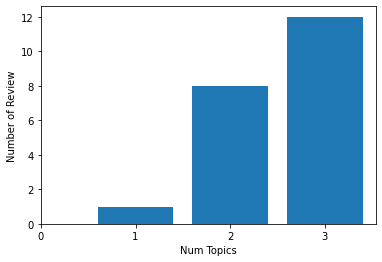

In [51]:
count=df.groupby('topics').count()
plt.bar(count.index.values, count['Review ID'])
plt.xlabel('Num Topics')
plt.xticks(range(0, 4))
plt.ylabel('Number of Review')
plt.show()